In [1]:
!pip install pandas
!pip install scikit-learn
!pip install nltk
!pip install gensim

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached smart_open-7.0.1-py3-none-any.whl.metadata (23 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
Using cached smart_open-7.0.1-py3-none-any.whl (60 kB)
Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl (37 kB)
Failed to build gensim


  error: subprocess-exited-with-error
  
  × Building wheel for gensim (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [714 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\gensim
      copying gensim\downloader.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\interfaces.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\matutils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\nosy.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\utils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\__init__.py -> build\lib.win-amd64-cpython-312\gensim
      creating build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\csvcorpus.py -> bui

# 2.1 

## english

Итак, выбор TfidfVectorizer обосновывается его способностью учитывать важность слов, игнорировать общие слова, нормализовать векторы и обладать гибкими параметрами, что обеспечивает хорошее качество векторизации текста для различных задач анализа текста и машинного обучения.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Пример текстового набора данных
documents = [
    "This is a sample document for demonstrating keyword extraction and vectorization.",
    "Vectorization of documents is a key step in natural language processing tasks.",
    "Keyword extraction helps in summarization and understanding of documents.",
    "Document vectorization converts text documents into numerical vectors for machine learning.",
    "Machine learning algorithms can then be applied to these numerical vectors."
]

# Создаем DataFrame из текстового набора данных
df = pd.DataFrame({'Text': documents})

# Инициализируем TfidfVectorizer для векторизации текстов
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Преобразуем тексты в TF-IDF векторы
tfidf_vectors = tfidf_vectorizer.fit_transform(df['Text'])

# Извлекаем имена признаков (слова) из TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Преобразуем TF-IDF векторы в DataFrame
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=feature_names)

# Добавляем ключевые слова/биграммы/триграммы как новые столбцы в исходный DataFrame
df = pd.concat([df, tfidf_df], axis=1)

# Выводим результаты
print(df)


                                                Text  algorithms   applied  \
0  This is a sample document for demonstrating ke...    0.000000  0.000000   
1  Vectorization of documents is a key step in na...    0.000000  0.000000   
2  Keyword extraction helps in summarization and ...    0.000000  0.000000   
3  Document vectorization converts text documents...    0.000000  0.000000   
4  Machine learning algorithms can then be applie...    0.466067  0.466067   

   converts  demonstrating  document  documents  extraction     helps  \
0  0.000000       0.476663  0.384569   0.000000    0.384569  0.000000   
1  0.000000       0.000000  0.000000   0.255010    0.000000  0.000000   
2  0.000000       0.000000  0.000000   0.307274    0.370169  0.458815   
3  0.403186       0.000000  0.325288   0.270019    0.000000  0.000000   
4  0.000000       0.000000  0.000000   0.000000    0.000000  0.000000   

        key  ...  numerical  processing    sample      step  summarization  \
0  0.000000  .

## Russia

Stop_worlds

russia_stop = [
    "и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все", "она", "так", "его",
    "но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от",
    "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже",
    "или", "ни", "быть", "был", "него", "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом",
    "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их",
    "чем", "была", "сам", "чтоб", "без", "будто", "чего", "раз", "тоже", "себе", "под", "будет", "ж", "тогда",
    "кто", "этот", "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", "один", "почти",
    "мой", "тем", "чтобы", "нее", "сейчас", "были", "куда", "зачем", "всех", "никогда", "можно", "при", "наконец",
    "два", "об", "другой", "хоть", "после", "над", "больше", "тот", "через", "эти", "нас", "про", "всего",
    "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой", "перед", "иногда",
    "лучше", "чуть", "том", "нельзя", "такой", "им", "более", "всегда", "конечно", "всю", "между"
]

Итак, выбор TfidfVectorizer обосновывается его способностью учитывать важность слов, игнорировать общие слова, нормализовать векторы и обладать гибкими параметрами, что обеспечивает хорошее качество векторизации текста для различных задач анализа текста и машинного обучения.

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Создание DataFrame с русскоязычными текстами
documents_df = pd.DataFrame({
    'Текст': [
        "Это пример текста для демонстрации извлечения ключевых слов и векторизации.",
        "Векторизация текстов - ключевой шаг в обработке естественного языка.",
        "Извлечение ключевых слов помогает в суммаризации и понимании текстов.",
        "Векторизация документов преобразует текстовые документы в числовые векторы для машинного обучения.",
        "Алгоритмы машинного обучения могут быть применены к этим числовым векторам."
    ]
})

# Инициализация TfidfVectorizer для векторизации текстов с русскими стоп-словами
tfidf_vectorizer = TfidfVectorizer(stop_words=['и', 'в', 'для', 'на', 'к', 'с', 'это', 'текста', 'текстов'])

# Преобразование текстов в TF-IDF векторы
tfidf_vectors = tfidf_vectorizer.fit_transform(documents_df['Текст'])

# Получение имен признаков (слов) из TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Преобразование TF-IDF векторов в DataFrame
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=feature_names)

# Добавление ключевых слов/биграмм/триграмм как новых столбцов в DataFrame с текстами
documents_df = pd.concat([documents_df, tfidf_df], axis=1)

# Вывод результатов
print(documents_df)


                                               Текст  алгоритмы      быть  \
0  Это пример текста для демонстрации извлечения ...   0.000000  0.000000   
1  Векторизация текстов - ключевой шаг в обработк...   0.000000  0.000000   
2  Извлечение ключевых слов помогает в суммаризац...   0.000000  0.000000   
3  Векторизация документов преобразует текстовые ...   0.000000  0.000000   
4  Алгоритмы машинного обучения могут быть примен...   0.347067  0.347067   

   векторам  векторизации  векторизация   векторы  демонстрации  документов  \
0  0.000000      0.434297      0.000000  0.000000      0.434297    0.000000   
1  0.000000      0.000000      0.339393  0.000000      0.000000    0.000000   
2  0.000000      0.000000      0.000000  0.000000      0.000000    0.000000   
3  0.000000      0.000000      0.286091  0.354602      0.000000    0.354602   
4  0.347067      0.000000      0.000000  0.000000      0.000000    0.000000   

   документы  ...  применены    пример      слов  суммаризации

CountVectorizer:

Принцип работы: CountVectorizer преобразует текстовые данные в векторы, учитывая только частоту встречаемости слов в документах (term frequency, TF). Каждое слово в документе представляется в виде индекса, а вектор содержит количество встреч этого слова в документе.

Преимущества:

Простота: CountVectorizer легко понять и использовать, не требует дополнительной настройки.
Интерпретируемость: Векторы, созданные с помощью CountVectorizer, просты для интерпретации, поскольку они прямо отражают частоту встречаемости слов в документах.

HashingVectorizer:

Принцип работы: HashingVectorizer использует хеширование для преобразования слов в индексы. Каждое слово хешируется в определенный индекс вектора фиксированной длины. Этот метод не сохраняет словарь слов и не требует большого объема памяти.

Преимущества:

Эффективность по памяти: HashingVectorizer требует гораздо меньше памяти, поскольку не сохраняет словарь слов.
Быстрота: HashingVectorizer может быть быстрее CountVectorizer при работе с большими наборами данных.

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

# Создание DataFrame с русскоязычными текстами
documents_df = pd.DataFrame({
    'Текст': [
        "Это пример текста для демонстрации извлечения ключевых слов и векторизации.",
        "Векторизация текстов - ключевой шаг в обработке естественного языка.",
        "Извлечение ключевых слов помогает в суммаризации и понимании текстов.",
        "Векторизация документов преобразует текстовые документы в числовые векторы для машинного обучения.",
        "Алгоритмы машинного обучения могут быть применены к этим числовым векторам."
    ]
})
russia_stop = [
    "и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", "то", "все", "она", "так", "его",
    "но", "да", "ты", "к", "у", "же", "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от",
    "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", "ну", "вдруг", "ли", "если", "уже",
    "или", "ни", "быть", "был", "него", "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом",
    "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо", "ней", "для", "мы", "тебя", "их",
    "чем", "была", "сам", "чтоб", "без", "будто", "чего", "раз", "тоже", "себе", "под", "будет", "ж", "тогда",
    "кто", "этот", "того", "потому", "этого", "какой", "совсем", "ним", "здесь", "этом", "один", "почти",
    "мой", "тем", "чтобы", "нее", "сейчас", "были", "куда", "зачем", "всех", "никогда", "можно", "при", "наконец",
    "два", "об", "другой", "хоть", "после", "над", "больше", "тот", "через", "эти", "нас", "про", "всего",
    "них", "какая", "много", "разве", "три", "эту", "моя", "впрочем", "хорошо", "свою", "этой", "перед", "иногда",
    "лучше", "чуть", "том", "нельзя", "такой", "им", "более", "всегда", "конечно", "всю", "между"
]

# Инициализация TfidfVectorizer для векторизации текстов с русскими стоп-словами
tfidf_vectorizer = TfidfVectorizer(stop_words=russia_stop)

# Преобразование текстов в TF-IDF векторы
tfidf_vectors = tfidf_vectorizer.fit_transform(documents_df['Текст'])

# Получение имен признаков (слов) из TfidfVectorizer
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Преобразование TF-IDF векторов в DataFrame
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_feature_names)

# Добавление TF-IDF векторов в DataFrame
documents_df = pd.concat([documents_df, tfidf_df], axis=1)

# Инициализация CountVectorizer для векторизации текстов
count_vectorizer = CountVectorizer(stop_words=russia_stop)

# Преобразование текстов в векторы с использованием CountVectorizer
count_vectors = count_vectorizer.fit_transform(documents_df['Текст'])

# Получение имен признаков (слов) из CountVectorizer
count_feature_names = count_vectorizer.get_feature_names_out()

# Преобразование векторов в DataFrame
count_df = pd.DataFrame(count_vectors.toarray(), columns=count_feature_names)

# Добавление векторов от CountVectorizer в DataFrame
documents_df = pd.concat([documents_df, count_df.add_suffix('_count')], axis=1)

# Инициализация HashingVectorizer для векторизации текстов
hashing_vectorizer = HashingVectorizer(stop_words=russia_stop)

# Преобразование текстов в векторы с использованием HashingVectorizer
hashing_vectors = hashing_vectorizer.fit_transform(documents_df['Текст'])

# Преобразование векторов в DataFrame
hashing_df = pd.DataFrame(hashing_vectors.toarray())

# Добавление векторов от HashingVectorizer в DataFrame
documents_df = pd.concat([documents_df, hashing_df.add_prefix('hash_')], axis=1)

# Вывод результатов
print(documents_df)


                                               Текст  алгоритмы  векторам  \
0  Это пример текста для демонстрации извлечения ...    0.00000   0.00000   
1  Векторизация текстов - ключевой шаг в обработк...    0.00000   0.00000   
2  Извлечение ключевых слов помогает в суммаризац...    0.00000   0.00000   
3  Векторизация документов преобразует текстовые ...    0.00000   0.00000   
4  Алгоритмы машинного обучения могут быть примен...    0.37007   0.37007   

   векторизации  векторизация   векторы  демонстрации  документов  документы  \
0       0.37007      0.000000  0.000000       0.37007    0.000000   0.000000   
1       0.00000      0.321388  0.000000       0.00000    0.000000   0.000000   
2       0.00000      0.000000  0.000000       0.00000    0.000000   0.000000   
3       0.00000      0.286091  0.354602       0.00000    0.354602   0.354602   
4       0.00000      0.000000  0.000000       0.00000    0.000000   0.000000   

   естественного  ...  hash_1048566  hash_1048567  hash_

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

# Создание DataFrame с русскоязычными текстами
documents_df = pd.DataFrame({
    'Текст': [
        "Это пример текста для демонстрации извлечения ключевых слов и векторизации.",
        "Векторизация текстов - ключевой шаг в обработке естественного языка.",
        "Извлечение ключевых слов помогает в суммаризации и понимании текстов.",
        "Векторизация документов преобразует текстовые документы в числовые векторы для машинного обучения.",
        "Алгоритмы машинного обучения могут быть применены к этим числовым векторам."
    ]
})

# Инициализация CountVectorizer для векторизации текстов
count_vectorizer = CountVectorizer(stop_words=['и', 'в', 'для', 'на', 'к', 'с', 'это', 'текста', 'текстов'])

# Преобразование текстов в векторы с использованием CountVectorizer
count_vectors = count_vectorizer.fit_transform(documents_df['Текст'])

# Получение имен признаков (слов) из CountVectorizer
count_feature_names = count_vectorizer.get_feature_names_out()

# Преобразование векторов в DataFrame
count_df = pd.DataFrame(count_vectors.toarray(), columns=count_feature_names)

# Добавление векторов от CountVectorizer в DataFrame
count_documents_df = pd.concat([documents_df, count_df.add_suffix('_count')], axis=1)

# Вывод результатов
print(count_documents_df)

# Инициализация HashingVectorizer для векторизации текстов
hashing_vectorizer = HashingVectorizer(stop_words=['и', 'в', 'для', 'на', 'к', 'с', 'это', 'текста', 'текстов'])

# Преобразование текстов в векторы с использованием HashingVectorizer
hashing_vectors = hashing_vectorizer.fit_transform(documents_df['Текст'])

# Преобразование векторов в DataFrame
hashing_df = pd.DataFrame(hashing_vectors.toarray())

# Добавление векторов от HashingVectorizer в DataFrame
hashing_documents_df = pd.concat([documents_df, hashing_df.add_prefix('hash_')], axis=1)

# Вывод результатов
print(hashing_documents_df)


                                               Текст  алгоритмы_count  \
0  Это пример текста для демонстрации извлечения ...                0   
1  Векторизация текстов - ключевой шаг в обработк...                0   
2  Извлечение ключевых слов помогает в суммаризац...                0   
3  Векторизация документов преобразует текстовые ...                0   
4  Алгоритмы машинного обучения могут быть примен...                1   

   быть_count  векторам_count  векторизации_count  векторизация_count  \
0           0               0                   1                   0   
1           0               0                   0                   1   
2           0               0                   0                   0   
3           0               0                   0                   1   
4           1               1                   0                   0   

   векторы_count  демонстрации_count  документов_count  документы_count  ...  \
0              0                   1      

# 2.2

In [6]:
!pip install wordcloud

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from docx import Document

# Функция для чтения текста из файла DOCX
def read_docx(file_path):
    doc = Document(file_path)
    text = [paragraph.text for paragraph in doc.paragraphs]
    return ' '.join(text)

# Чтение данных из файла CSV


# Чтение текста из файла DOCX
text_docx = read_docx('sample-docx-file-for-testing.docx')

# Преобразование данных в векторное представление (мешок слов)
vectorizer = CountVectorizer(stop_words='english', max_df=2, min_df=0.95)



# Обучение CountVectorizer на тексте из файла DOCX и его преобразование в векторное представление
X_docx = vectorizer.fit_transform([text_docx])

# Обучение модели тематического моделирования (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_docx)

# Визуализация результатов
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


Topic 1:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 2:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 3:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 4:
sed ut ac amet et sit eu vitae vel tincidunt

Topic 5:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia



NameError: name 'plt' is not defined

## DOCX

Для визуализации результатов тематического моделирования, обычно используется облако слов (Word Cloud). Облако слов представляет собой графическое представление наиболее часто встречающихся слов в каждой теме. Каждое слово в облаке представлено в виде шрифта, размер которого пропорционален частоте встречаемости слова в теме.

Почему используется облако слов:

Интуитивность: Облако слов легко интерпретируется и понимается даже людьми, не знакомыми с техническими деталями алгоритмов.
Визуальное представление: Он предоставляет визуальное представление результатов тематического моделирования, что облегчает их анализ.
Выделение ключевых слов: Позволяет быстро выделить ключевые слова в каждой теме и определить основные тематики.

Topic 1:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 2:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 3:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 4:
sed ut ac amet et sit eu vitae vel tincidunt

Topic 5:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia



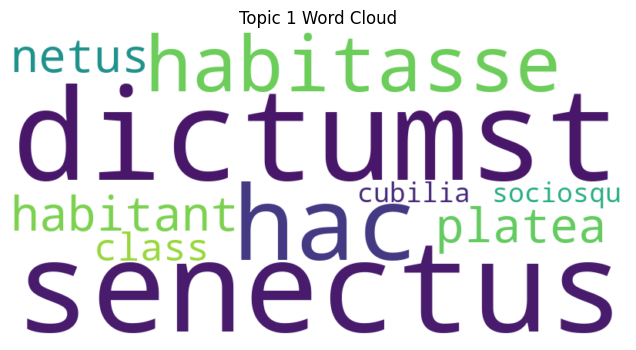

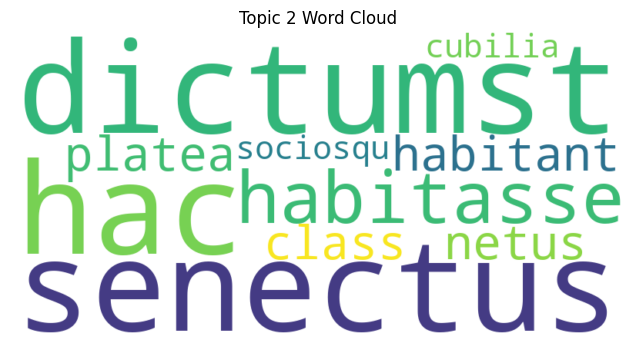

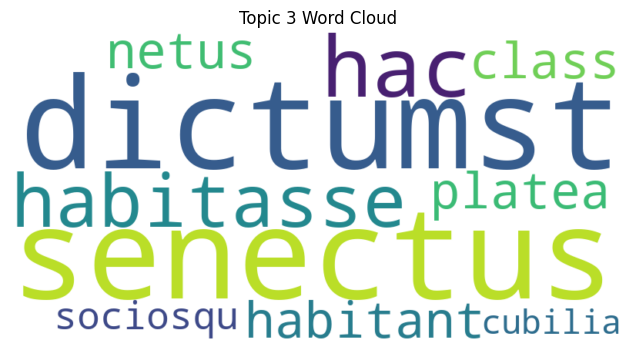

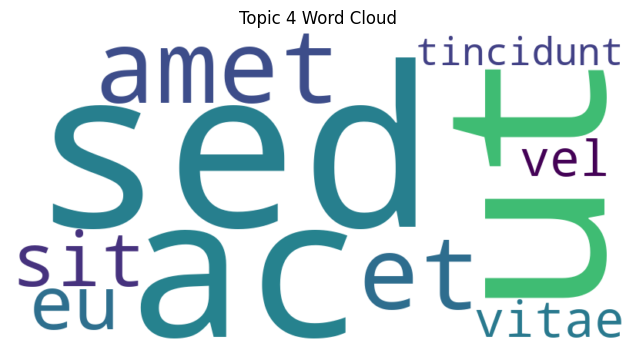

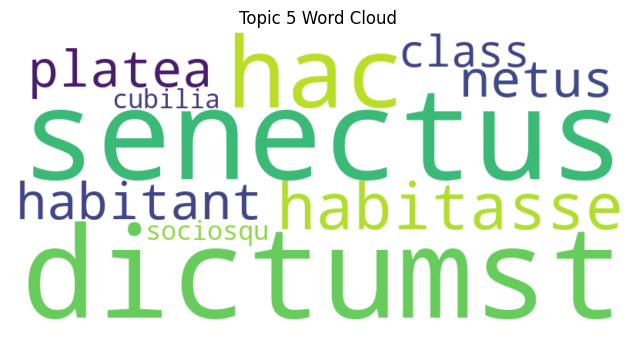

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from docx import Document

# Функция для чтения текста из файла DOCX
def read_docx(file_path):
    doc = Document(file_path)
    text = [paragraph.text for paragraph in doc.paragraphs]
    return ' '.join(text)

# Чтение данных из файла CSV
data_csv = pd.read_csv('total_5_regions.csv')

# Чтение текста из файла DOCX
text_docx = read_docx('sample-docx-file-for-testing.docx')

# Преобразование данных в векторное представление (мешок слов)
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
vectorizer1 = CountVectorizer(stop_words='english', max_df=2, min_df=0.95)
X_csv = vectorizer.fit_transform(data_csv['tags'])

# Обучение CountVectorizer на тексте из файла DOCX и его преобразование в векторное представление
X_docx = vectorizer1.fit_transform([text_docx])

# Обучение модели тематического моделирования (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_docx)

# Визуализация результатов
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer1.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer1.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

### алгоритм LDA

Latent Dirichlet Allocation (LDA):

LDA является одним из наиболее популярных и широко используемых алгоритмов тематического моделирования.
Он основан на предположении, что каждый документ можно представить как смесь различных тем, а каждая тема представляет собой распределение вероятностей слов.
LDA исходит из статистических моделей, которые объясняют, как слова в документах распределяются среди различных тем.
Поэтому LDA часто используется для идентификации тем в текстовых данных.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from docx import Document

# Чтение текста из файла DOCX
def read_docx(file_path):
    doc = Document(file_path)
    text = [paragraph.text for paragraph in doc.paragraphs]
    return ' '.join(text)

text_docx = read_docx('sample-docx-file-for-testing.docx')

# Преобразование текста из файла DOCX в векторное представление (мешок слов)
vectorizer = CountVectorizer(stop_words='english', max_df=2, min_df=0.95)
X_docx = vectorizer.fit_transform([text_docx])


Topic 1:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 2:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 3:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia

Topic 4:
sed ut ac amet et sit eu vitae vel tincidunt

Topic 5:
senectus dictumst hac habitasse habitant platea netus class sociosqu cubilia



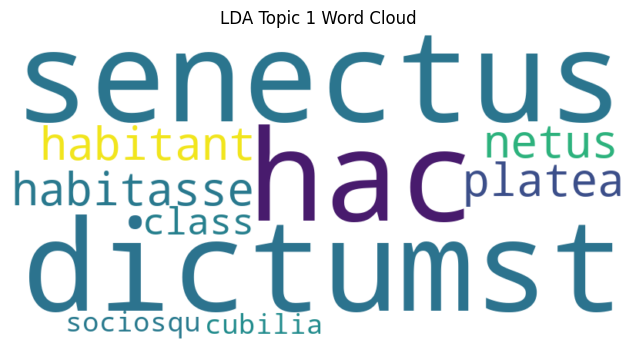

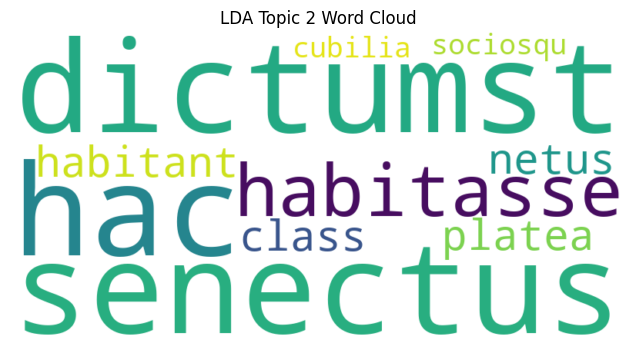

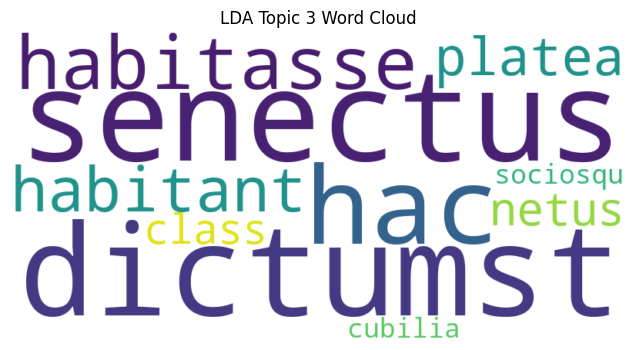

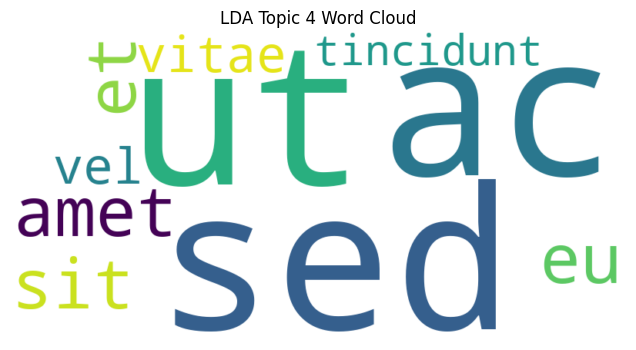

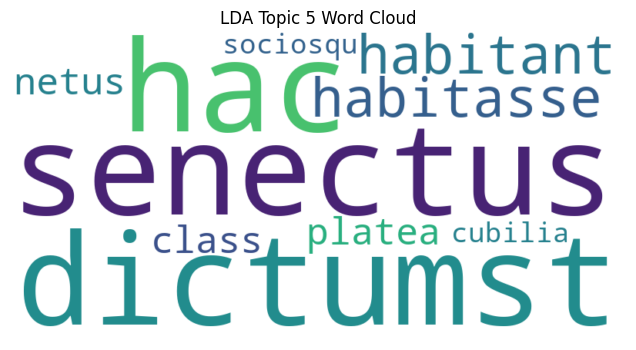

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Обучение модели LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_docx)

# Визуализация результатов LDA
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы LDA
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'LDA Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


### алгоритм NMF

Non-negative Matrix Factorization (NMF):

NMF - это алгоритм разложения матриц, который предполагает, что данные представляют собой смесь неотрицательных составляющих.
В контексте тематического моделирования NMF также ищет смеси тем в документах, но при этом он требует, чтобы все элементы матриц были неотрицательными.
Поэтому NMF часто используется для задач, где все данные положительны, что включает в себя большинство текстовых данных.

Topic 1:
sed ut ac eu amet et sit vel nec nunc

Topic 2:
lectus efficitur ex id facilisis nam egestas cursus amet urna

Topic 3:
nulla volutpat neque blandit arcu congue lacus faucibus hendrerit metus

Topic 4:
duis diam placerat consequat justo feugiat convallis fusce tincidunt praesent

Topic 5:
cursus dolor ornare mauris vulputate augue eleifend pulvinar sed egestas



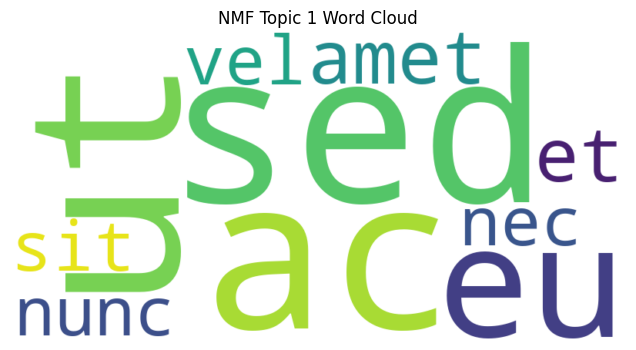

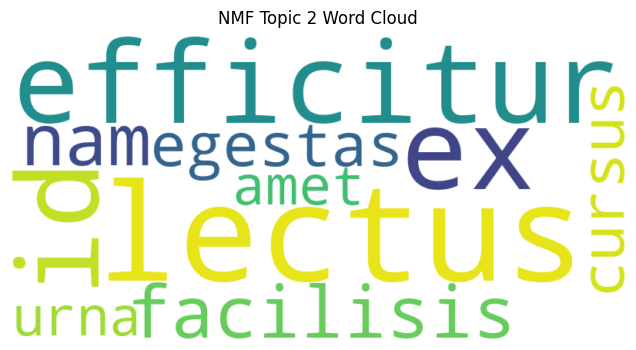

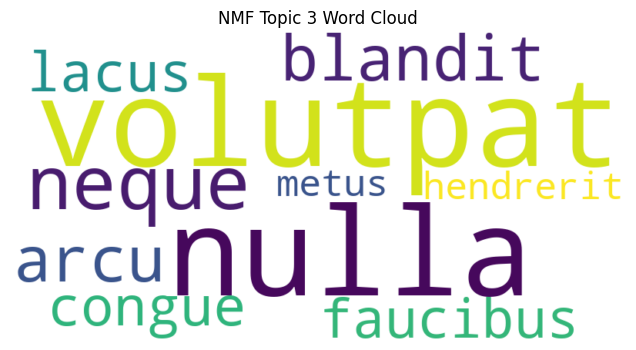

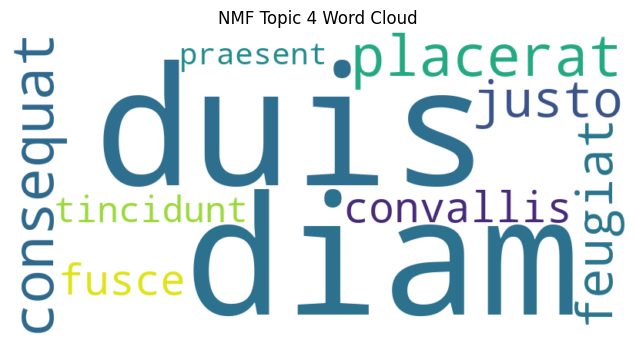

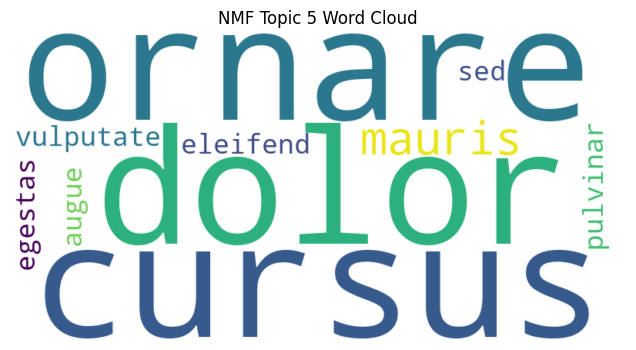

In [ ]:
from sklearn.decomposition import NMF

# Обучение модели NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X_docx)

# Визуализация результатов NMF
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы NMF
for topic_idx, topic in enumerate(nmf.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'NMF Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


### алгоритм LSA

Latent Semantic Analysis (LSA):

LSA - это метод, основанный на сингулярном разложении матрицы, который используется для анализа неявных отношений между словами и документами в текстовых данных.
Он основан на идее, что слова, которые часто встречаются вместе в разных документах, вероятно, имеют схожие значения или тематики.
LSA пытается найти семантические структуры в данных, проецируя их в пространство меньшей размерности.

c:\Users\tooer\OneDrive\Рабочий стол\new\data\.venv\Lib\site-packages\sklearn\decomposition\_truncated_svd.py:273: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Topic 1:
sed ut ac amet et sit eu vitae vel tincidunt



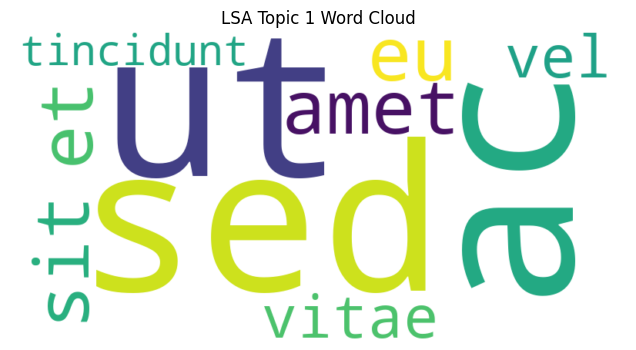

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Обучение модели LSA
lsa = TruncatedSVD(n_components=5, random_state=42)
lsa.fit(X_docx)

# Визуализация результатов LSA
for topic_idx, topic in enumerate(lsa.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы LSA
for topic_idx, topic in enumerate(lsa.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'LSA Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


## CSV

Для визуализации результатов тематического моделирования, обычно используется облако слов (Word Cloud). Облако слов представляет собой графическое представление наиболее часто встречающихся слов в каждой теме. Каждое слово в облаке представлено в виде шрифта, размер которого пропорционален частоте встречаемости слова в теме.

Почему используется облако слов:

Интуитивность: Облако слов легко интерпретируется и понимается даже людьми, не знакомыми с техническими деталями алгоритмов.
Визуальное представление: Он предоставляет визуальное представление результатов тематического моделирования, что облегчает их анализ.
Выделение ключевых слов: Позволяет быстро выделить ключевые слова в каждой теме и определить основные тематики.

Topic 1:
лет 16 дети возрасте до пострадавшие дтп за вине пешеходы

Topic 2:
на пешеходов пострадавшие дтп из наезда пешеходных пешеходы по переходах

Topic 3:
дтп пострадавшие 16 лет дети возрасте до из пешеходных наезда

Topic 4:
лет 16 дети возрасте до пострадавшие дтп вине пешеходы переходах

Topic 5:
дтп пострадавшие до возрасте дети 16 лет вине за по



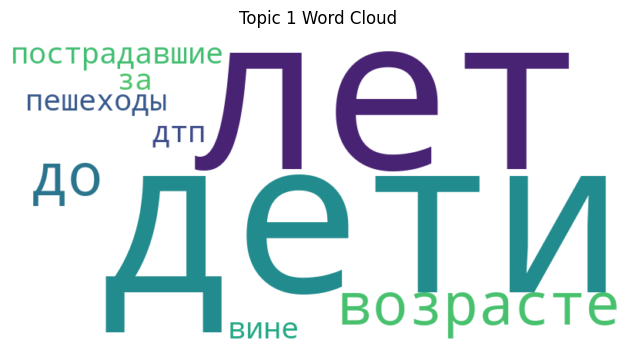

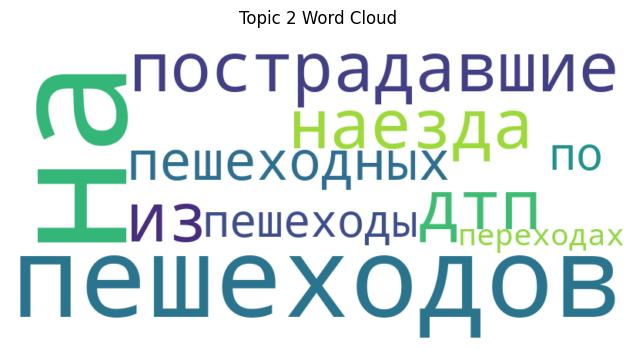

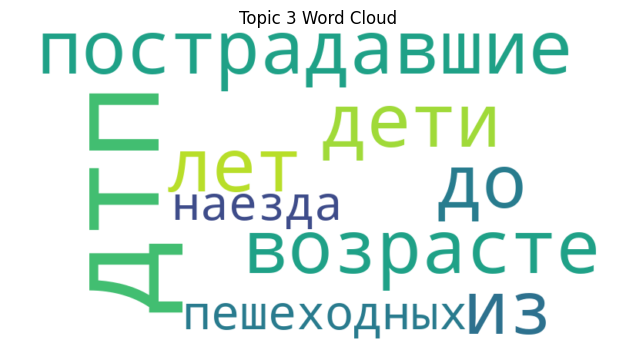

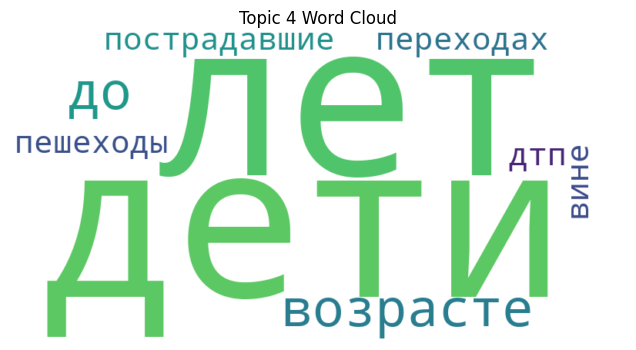

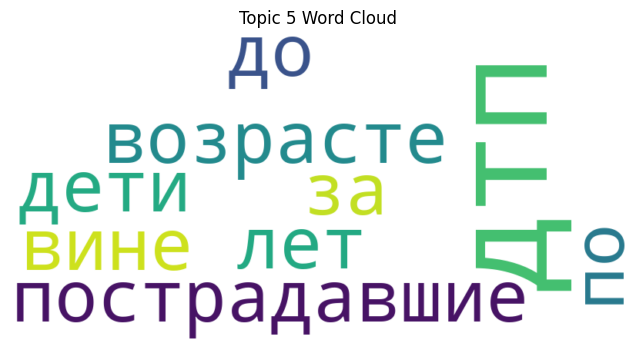

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

# Чтение данных из файла CSV
data_csv = pd.read_csv('total_5_regions.csv')

# Преобразование данных в векторное представление (мешок слов)
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_csv = vectorizer.fit_transform(data_csv['tags'])

# Обучение модели тематического моделирования (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_csv)

# Визуализация результатов
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


### алгоритм LDA

Latent Dirichlet Allocation (LDA):

LDA является одним из наиболее популярных и широко используемых алгоритмов тематического моделирования.
Он основан на предположении, что каждый документ можно представить как смесь различных тем, а каждая тема представляет собой распределение вероятностей слов.
LDA исходит из статистических моделей, которые объясняют, как слова в документах распределяются среди различных тем.
Поэтому LDA часто используется для идентификации тем в текстовых данных.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Чтение данных из файла CSV
data_csv = pd.read_csv('total_5_regions.csv')

# Преобразование данных в векторное представление (мешок слов)
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_csv = vectorizer.fit_transform(data_csv['tags'])


Topic 1:
лет 16 дети возрасте до пострадавшие дтп за вине пешеходы

Topic 2:
на пешеходов пострадавшие дтп из наезда пешеходных пешеходы по переходах

Topic 3:
дтп пострадавшие 16 лет дети возрасте до из пешеходных наезда

Topic 4:
лет 16 дети возрасте до пострадавшие дтп вине пешеходы переходах

Topic 5:
дтп пострадавшие до возрасте дети 16 лет вине за по



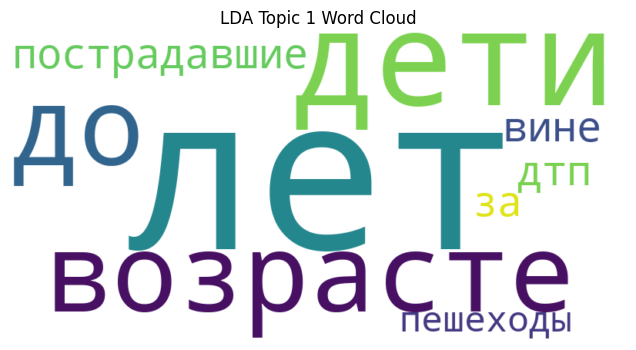

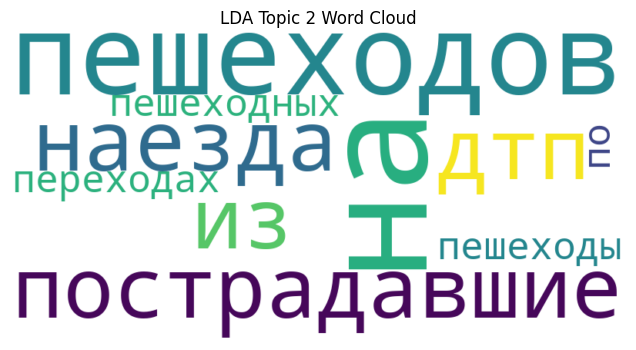

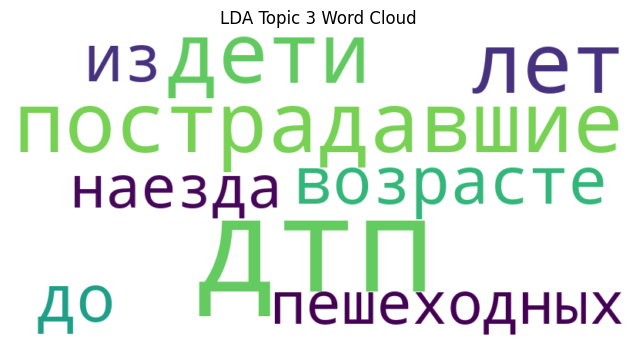

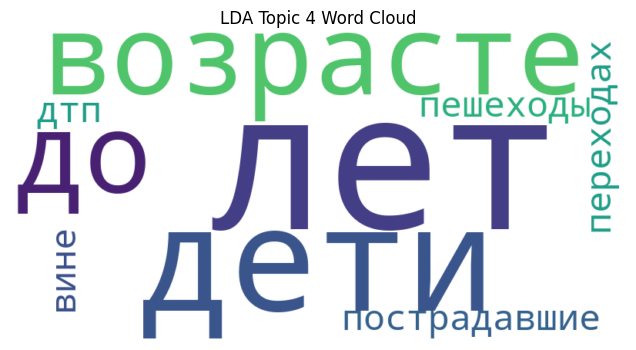

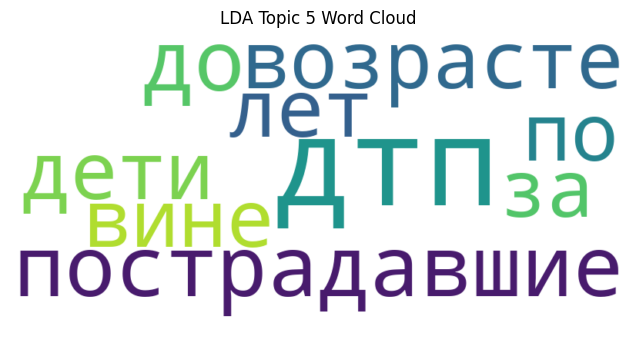

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Обучение модели LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_csv)

# Визуализация результатов LDA
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы LDA
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'LDA Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


### алгоритм NMF

Non-negative Matrix Factorization (NMF):

NMF - это алгоритм разложения матриц, который предполагает, что данные представляют собой смесь неотрицательных составляющих.
В контексте тематического моделирования NMF также ищет смеси тем в документах, но при этом он требует, чтобы все элементы матриц были неотрицательными.
Поэтому NMF часто используется для задач, где все данные положительны, что включает в себя большинство текстовых данных.

Topic 1:
пострадавшие дтп возрасте дети до лет 16 наезда на по

Topic 2:
пешеходов на пешеходы пешеходных переходах наезда по из за вине

Topic 3:
лет до возрасте дети 16 переходах наезда на по из

Topic 4:
пострадавшие из вине возрасте дети до дтп за лет по

Topic 5:
пострадавшие из вине возрасте дети до дтп за лет по



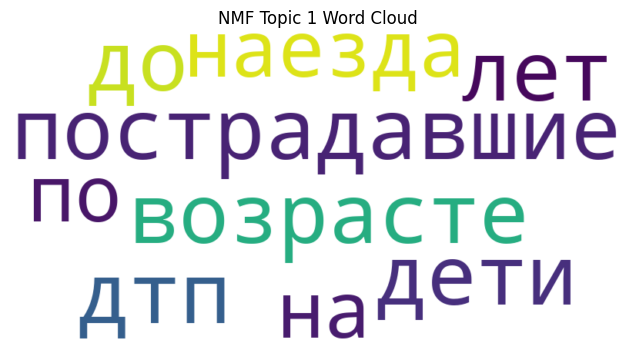

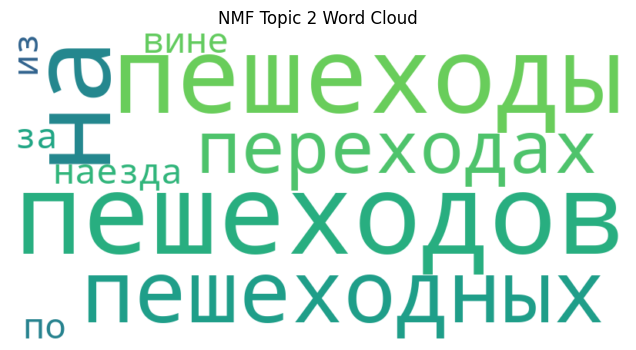

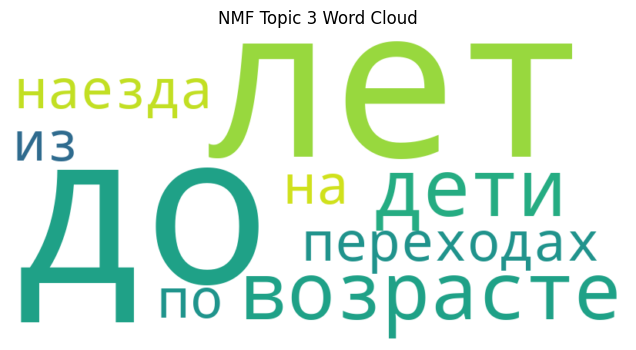

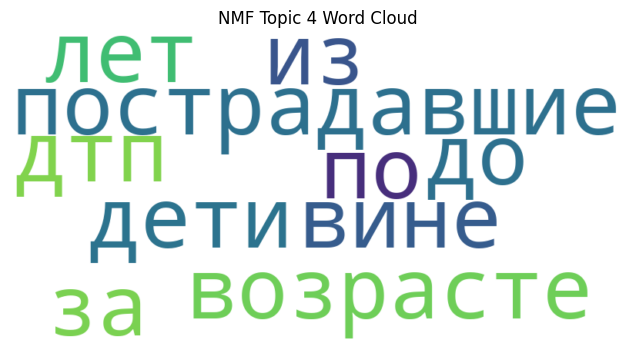

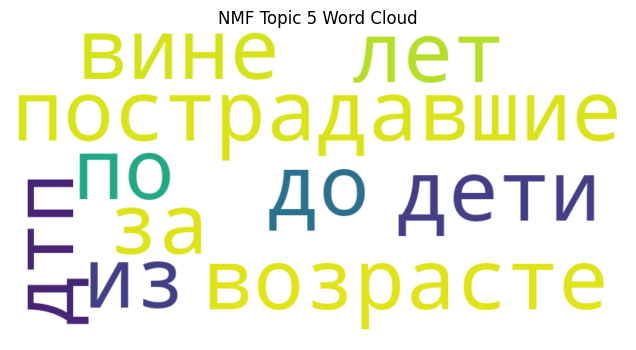

In [ ]:
from sklearn.decomposition import NMF

# Обучение модели NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X_csv)

# Визуализация результатов NMF
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы NMF
for topic_idx, topic in enumerate(nmf.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'NMF Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


### алгоритм LSA

Latent Semantic Analysis (LSA):

LSA - это метод, основанный на сингулярном разложении матрицы, который используется для анализа неявных отношений между словами и документами в текстовых данных.
Он основан на идее, что слова, которые часто встречаются вместе в разных документах, вероятно, имеют схожие значения или тематики.
LSA пытается найти семантические структуры в данных, проецируя их в пространство меньшей размерности.

Topic 1:
пострадавшие дтп 16 до дети возрасте лет пешеходов на пешеходных

Topic 2:
пешеходов на вине пешеходы пешеходных переходах наезда по из за

Topic 3:
пострадавшие дтп вине пешеходы пешеходных переходах наезда по из за

Topic 4:
вине 16 дтп пострадавшие возрасте до лет дети по пешеходных

Topic 5:
16 пешеходов на пешеходы пешеходных переходах наезда из за по



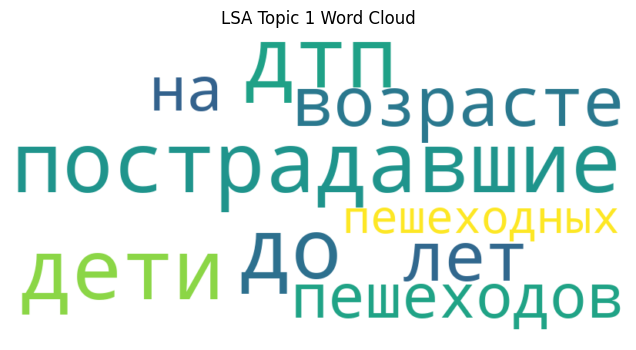

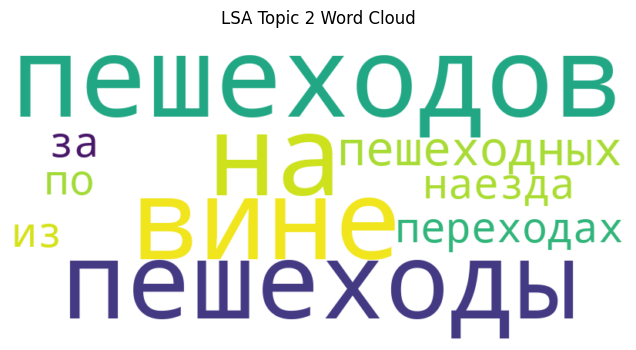

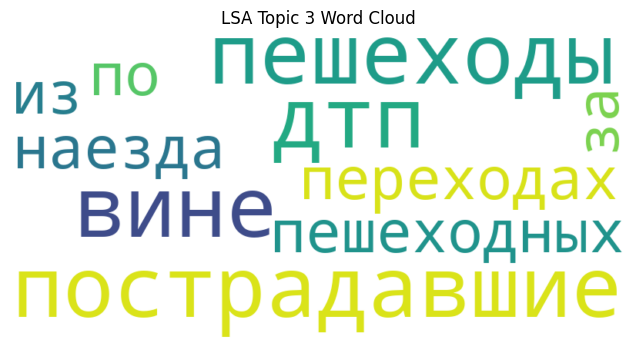

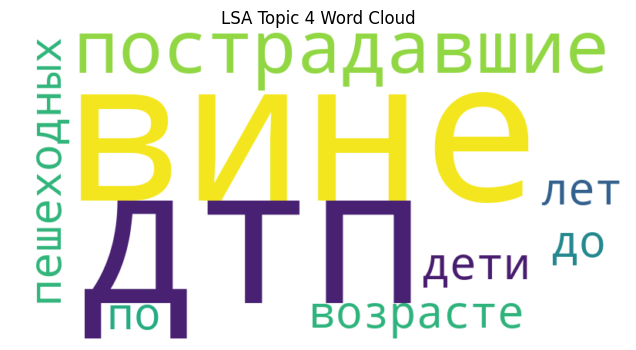

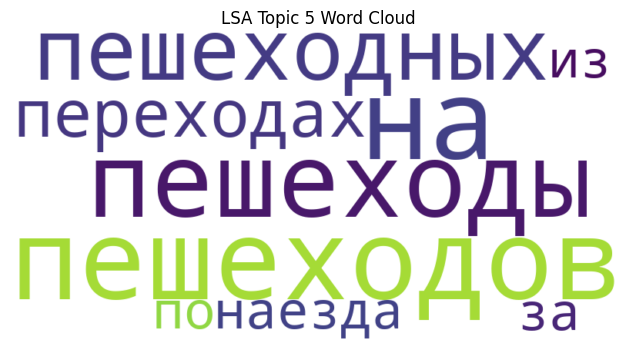

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Обучение модели LSA
lsa = TruncatedSVD(n_components=5, random_state=42)
lsa.fit(X_csv)

# Визуализация результатов LSA
for topic_idx, topic in enumerate(lsa.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# Визуализация облака слов для каждой темы LSA
for topic_idx, topic in enumerate(lsa.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'LSA Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()


# 2.3

In [ ]:
!pip install matplotlib

  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.50.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.50.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.2.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


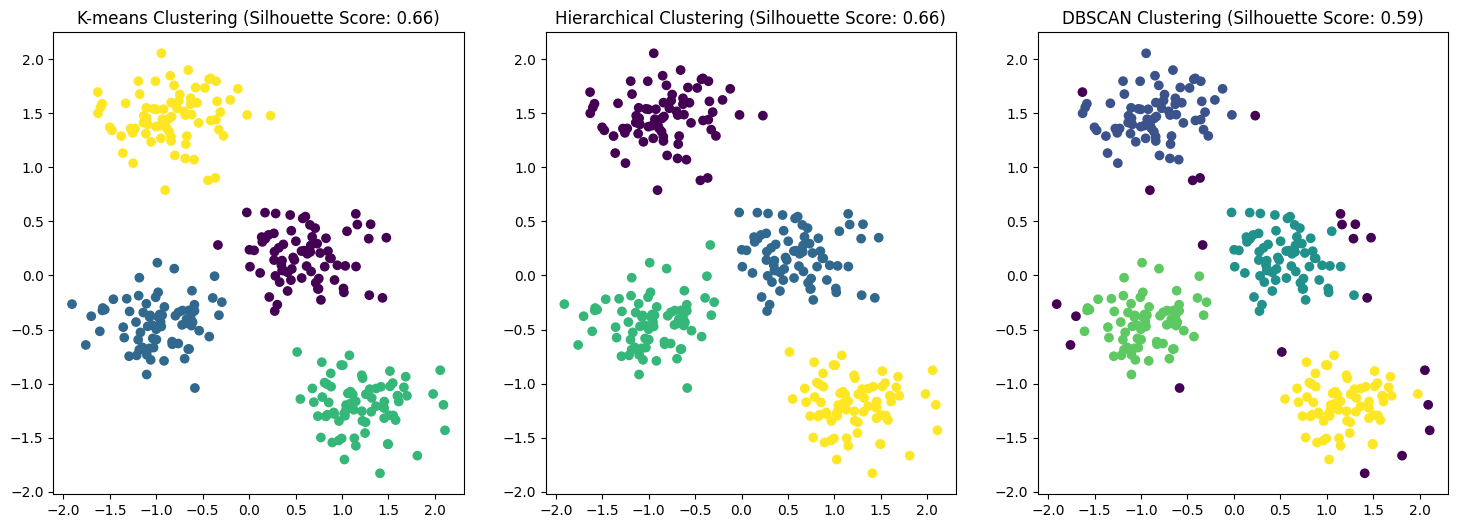

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Генерируем синтетические данные (замените эту часть кода на загрузку ваших данных)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Приводим данные к единому масштабу
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Определяем количество кластеров
n_clusters = 4

# 1. Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# 2. Иерархическая кластеризация
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)

# 3. Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)

# Визуализация результатов кластеризации
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-means Clustering (Silhouette Score: {kmeans_silhouette:.2f})')

plt.subplot(132)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title(f'Hierarchical Clustering (Silhouette Score: {hierarchical_silhouette:.2f})')

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'DBSCAN Clustering (Silhouette Score: {dbscan_silhouette:.2f})')

plt.show()


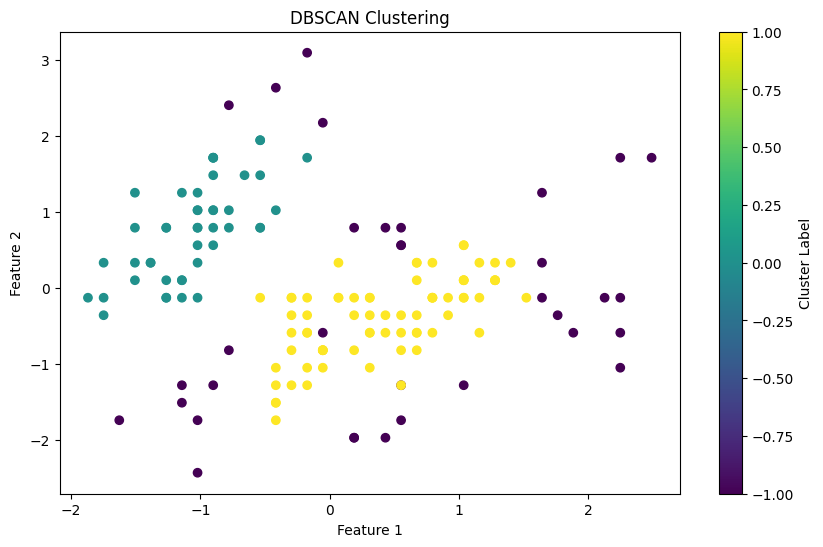

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X = iris.data  # Особенности

# Приводим данные к единому масштабу
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
!pip install python-docx


  Using cached typing_extensions-4.10.0-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/239.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/239.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/239.6 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/239.6 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/239.6 kB 363.1 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/239.6 kB 363.1 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/239.6 kB 348.6 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/239.6 kB 364.4 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/239.6 kB 343.4 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/239.6 kB 343.4 kB/s eta 0:00:01
   ------------------------- ------------ 163.8/239.6 kB 392.8 kB/s eta 0:00:01
   ------------------------- ------------ 163.8/239.6 kB 392.8

Метод логтя

Метод локтя (Elbow Method):

Этот метод основан на анализе инерции кластеризации, которая представляет собой сумму квадратов расстояний от каждой точки данных до ближайшего к ней центра кластера.
Идея заключается в том, чтобы найти такое количество кластеров, после которого уменьшение инерции становится незначительным (как будто формируется "локоть" на графике инерции).
Оптимальное количество кластеров выбирается в точке локтя.

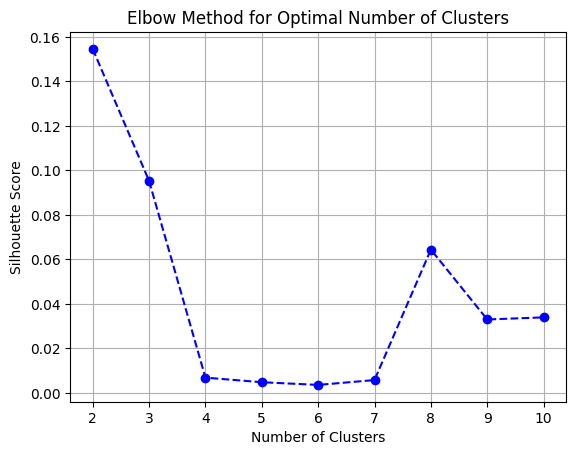

In [ ]:
import docx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Загрузка текста из файла .docx
def read_docx(file_path):
    doc = docx.Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

# Открываем .docx файл
doc = Document("sample-docx-file-for-testing.docx")

# Извлекаем текст из документа
text = [paragraph.text for paragraph in doc.paragraphs]

# Создаем DataFrame с текстом
documents_df = pd.DataFrame({'Text': text})



# Инициализация TfidfVectorizer для векторизации текстов
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Преобразование текстов в TF-IDF векторы
tfidf_vectors = tfidf_vectorizer.fit_transform(documents_df['Text'])

# Получение имен признаков (слов) из TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Преобразование TF-IDF векторов в DataFrame
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=feature_names)

# Добавление TF-IDF признаков в DataFrame с текстами
documents_df = pd.concat([documents_df, tfidf_df], axis=1)

# Масштабирование TF-IDF признаков
scaler = StandardScaler()
scaled_tfidf = scaler.fit_transform(tfidf_df)

# Кластеризация с помощью K-means
kmeans_silhouette_scores = []
k_range = range(2, 11)  # Диапазон количества кластеров
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_tfidf)
    silhouette_score_avg = silhouette_score(scaled_tfidf, kmeans_labels)
    kmeans_silhouette_scores.append(silhouette_score_avg)

# Визуализация метода локтя
plt.plot(k_range, kmeans_silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
!pip install textract

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/133.4 kB ? eta -:--:--
   ----------- --------------------------- 41.0/133.4 kB 653.6 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/133.4 kB 653.6 kB/s eta 0:00:01
   ----------------------- --------------- 81.9/133.4 kB 508.4 kB/s eta 0:00:01
   -------------------------- ------------ 92.2/133.4 kB 435.7 kB/s eta 0:00:01
   ---------------------------

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


Метод силуэта

Метрика силуэта (Silhouette Score):

Эта метрика оценивает компактность кластеров и их разделимость.
Для каждой точки данных вычисляется силуэт, который является отношением среднего расстояния от данной точки до точек своего кластера к среднему расстоянию от данной точки до точек ближайшего кластера.
Значение силуэта находится в диапазоне от -1 до 1, где более высокие значения указывают на более компактные и различимые кластеры.
Оптимальное количество кластеров можно выбрать на основе максимального среднего значения силуэта по всем точкам данных.

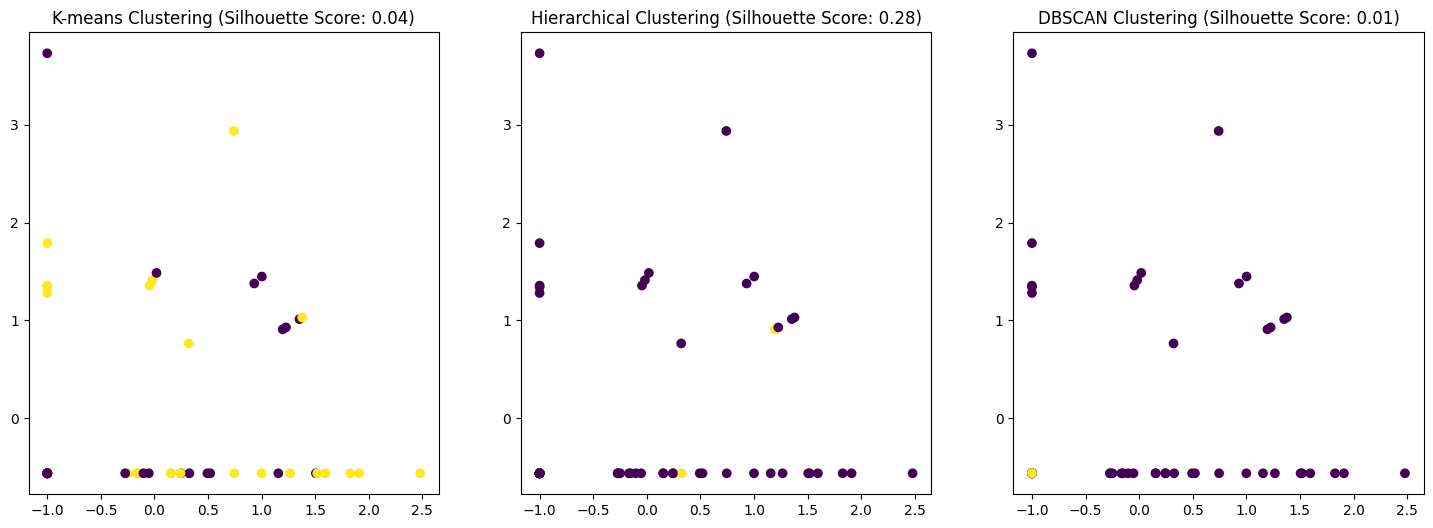

In [ ]:
import docx2txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Функция для загрузки текста из файла .docx
def read_docx(file_path):
    text = docx2txt.process(file_path)
    return text

# Открываем .docx файл
doc = Document("sample-docx-file-for-testing.docx")

# Извлекаем текст из документа
text = [paragraph.text for paragraph in doc.paragraphs]

# Создаем DataFrame с текстом
documents_df = pd.DataFrame({'Text': text})


# Инициализация TfidfVectorizer для векторизации текста
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Преобразование текста в TF-IDF векторы
tfidf_vectors = tfidf_vectorizer.fit_transform(documents_df['Text'])

# Приводим TF-IDF векторы к единому масштабу
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_vectors.toarray())

# Определяем количество кластеров
n_clusters = 2

# 1. Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# 2. Иерархическая кластеризация
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)

# 3. Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)

# Визуализация результатов кластеризации
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-means Clustering (Silhouette Score: {kmeans_silhouette:.2f})')

plt.subplot(132)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title(f'Hierarchical Clustering (Silhouette Score: {hierarchical_silhouette:.2f})')

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title(f'DBSCAN Clustering (Silhouette Score: {dbscan_silhouette:.2f})')

plt.show()


из этого видно что данные очень расплывчевы

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from docx import Document

# Открываем .docx файл
doc = Document("sample-docx-file-for-testing.docx")

# Извлекаем текст из документа
text = [paragraph.text for paragraph in doc.paragraphs]

# Создаем DataFrame с текстом
documents_df = pd.DataFrame({'Text': text})

# Инициализация TfidfVectorizer для векторизации текстов
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectors = tfidf_vectorizer.fit_transform(documents_df['Text'])

# Определяем количество кластеров
n_clusters = 4

# Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(tfidf_vectors)
kmeans_silhouette = silhouette_score(tfidf_vectors, kmeans_labels)

# Вывод результатов
print(f'K-means Clustering (Silhouette Score: {kmeans_silhouette:.2f})')


K-means Clustering (Silhouette Score: 0.04)


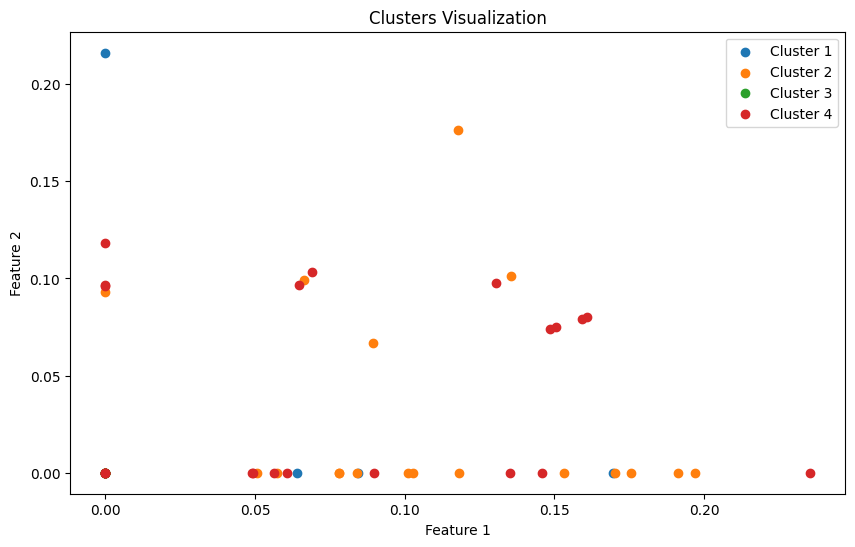

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from docx import Document

# Открываем .docx файл
doc = Document("sample-docx-file-for-testing.docx")

# Извлекаем текст из документа
text = [paragraph.text for paragraph in doc.paragraphs]

# Создаем DataFrame с текстом
documents_df = pd.DataFrame({'Text': text})

# Инициализация TfidfVectorizer для векторизации текстов
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectors = tfidf_vectorizer.fit_transform(documents_df['Text'])

# Определяем количество кластеров
n_clusters = 4

# Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(tfidf_vectors)

# Преобразуем tfidf_vectors в плотное представление
dense_tfidf_vectors = tfidf_vectors.toarray()

# Визуализация результатов кластеризации с использованием диаграммы рассеяния
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    cluster_samples = dense_tfidf_vectors[kmeans_labels == cluster_id]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {cluster_id + 1}')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [10]:
data = pd.read_csv('total_5_regions.csv')

In [11]:
data

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
0,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",7,1,2015-09-16 13:00:00,Легкий,...,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,red
1,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",21,15,2017-08-25 15:30:00,Легкий,...,8,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289,0,red
2,2576909,Дорожно-транспортные происшествия,4,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",21,16,2021-05-29 19:40:00,Тяжёлый,...,9,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193,0,red
3,2575209,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",21,16,2021-05-25 16:40:00,Легкий,...,2,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096,0,red
4,2547743,Дорожно-транспортные происшествия,4,"Эстакада, путепровод",Барнаул,"г Барнаул, Объездная дорога в обход г. Барнаул...",21,16,2021-02-22 13:50:00,Тяжёлый,...,2,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157,3,darkgreen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,1582981,Дорожно-транспортные происшествия,2,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 66 км",21,16,2017-09-26 19:15:00,С погибшими,...,2,50.602901,38.660358,578,3,1,3.591911e-05,0.005190,0,red
67459,1581580,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Административные з...",Алексеевский район,"г Алексеевка, ул Тимирязева, 10",7,16,2016-10-04 15:55:00,Легкий,...,2,50.614987,38.692945,578,4,3,1.197304e-05,0.006920,0,red
67460,1581982,Дорожно-транспортные происшествия,4,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 81 км",7,16,2019-01-19 20:00:00,С погибшими,...,2,50.706406,38.655910,578,2,1,2.394607e-05,0.003460,0,red
67461,1585276,"Дорожно-транспортные происшествия, ДТП и постр...",4,Нерегулируемый перекрёсток неравнозначных улиц...,Алексеевский район,"а/д Белгород-Новый Оскол-Советское, 167 км",7,16,2017-10-29 14:30:00,Легкий,...,8,50.603560,38.660960,578,15,3,4.489889e-05,0.025952,2,lightgreen


In [15]:
!pip install spacy

  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp312-cp312-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp312-cp312-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.3.4-py3-none-any.whl.metadata (4.7 kB)
  Using cached smart_open-6.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached pydantic-2.6.4-py3-none-any.whl.metadata (85 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached setuptools-69.2.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached pydantic_core-2.16.3-cp312-none-win_

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [17]:
import spacy

# Загрузка модели SpaCy для русского языка
nlp = spacy.load('ru_core_news_sm')

# Пример функции для токенизации и лемматизации текста на русском языке
def tokenize_and_lemmatize_spacy_russian(text):
    doc = nlp(text)  # Обработка текста SpaCy на русском языке
    lemmatized_tokens = [token.lemma_ for token in doc]  # Получение лемм для каждого токена
    return lemmatized_tokens

# Применение функции к столбцу с текстами публикаций
data['lemmatized_text'] = data['tags'].apply(tokenize_and_lemmatize_spacy_russian)


In [19]:
data

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color,lemmatized_text
0,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",7,1,2015-09-16 13:00:00,Легкий,...,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,red,"[дорожно, -, транспортный, происшествие, ,, дт..."
1,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",21,15,2017-08-25 15:30:00,Легкий,...,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289,0,red,"[дорожно, -, транспортный, происшествие, ,, дт..."
2,2576909,Дорожно-транспортные происшествия,4,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",21,16,2021-05-29 19:40:00,Тяжёлый,...,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193,0,red,"[дорожно, -, транспортный, происшествие]"
3,2575209,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",21,16,2021-05-25 16:40:00,Легкий,...,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096,0,red,"[дорожно, -, транспортный, происшествие]"
4,2547743,Дорожно-транспортные происшествия,4,"Эстакада, путепровод",Барнаул,"г Барнаул, Объездная дорога в обход г. Барнаул...",21,16,2021-02-22 13:50:00,Тяжёлый,...,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157,3,darkgreen,"[дорожно, -, транспортный, происшествие]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,1582981,Дорожно-транспортные происшествия,2,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 66 км",21,16,2017-09-26 19:15:00,С погибшими,...,50.602901,38.660358,578,3,1,3.591911e-05,0.005190,0,red,"[дорожно, -, транспортный, происшествие]"
67459,1581580,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Административные з...",Алексеевский район,"г Алексеевка, ул Тимирязева, 10",7,16,2016-10-04 15:55:00,Легкий,...,50.614987,38.692945,578,4,3,1.197304e-05,0.006920,0,red,"[дорожно, -, транспортный, происшествие]"
67460,1581982,Дорожно-транспортные происшествия,4,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 81 км",7,16,2019-01-19 20:00:00,С погибшими,...,50.706406,38.655910,578,2,1,2.394607e-05,0.003460,0,red,"[дорожно, -, транспортный, происшествие]"
67461,1585276,"Дорожно-транспортные происшествия, ДТП и постр...",4,Нерегулируемый перекрёсток неравнозначных улиц...,Алексеевский район,"а/д Белгород-Новый Оскол-Советское, 167 км",7,16,2017-10-29 14:30:00,Легкий,...,50.603560,38.660960,578,15,3,4.489889e-05,0.025952,2,lightgreen,"[дорожно, -, транспортный, происшествие, ,, дт..."


In [20]:
!pip install seaborn

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


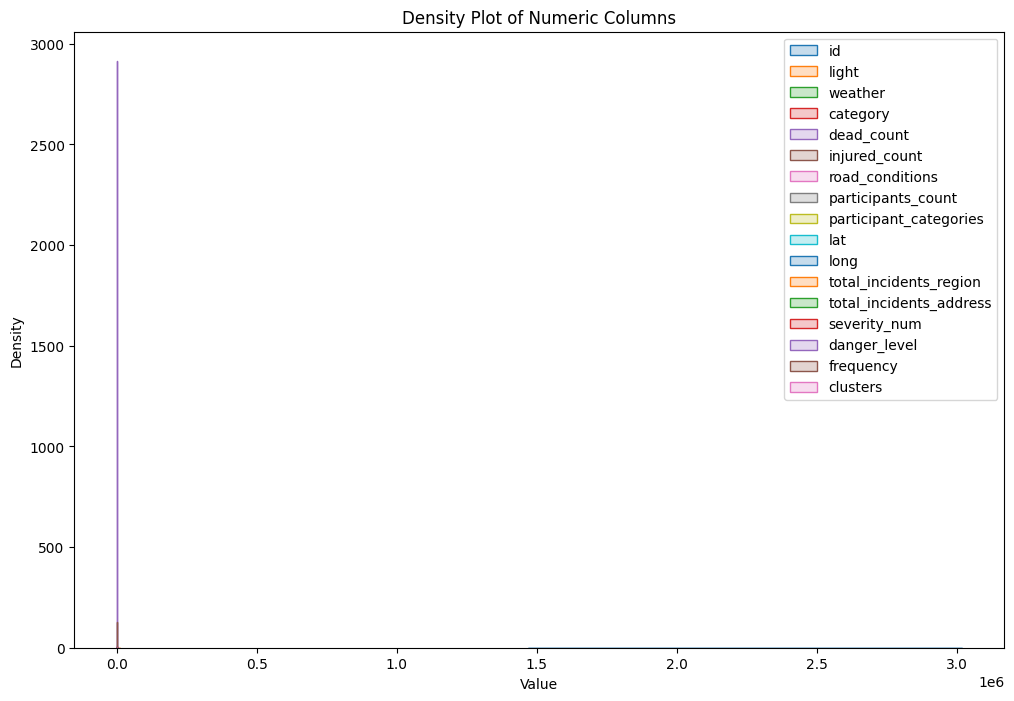

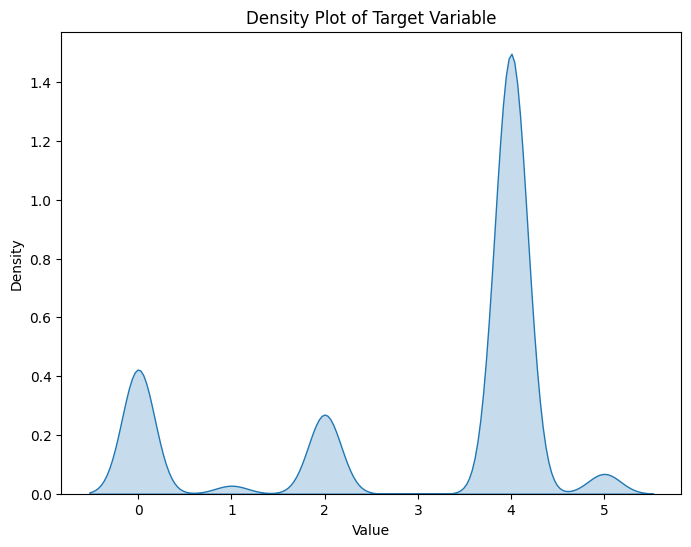

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv("total_5_regions.csv")

# Анализ плотности распределения числовых атрибутов
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(12, 8))
for column in numeric_columns:
    sns.kdeplot(data[column], fill=True, label=column)
plt.title("Density Plot of Numeric Columns")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Анализ плотности распределения целевой переменной
plt.figure(figsize=(8, 6))
sns.kdeplot(data['light'], fill=True)
plt.title("Density Plot of Target Variable")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


In [23]:
data

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
0,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",7,1,2015-09-16 13:00:00,Легкий,...,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,red
1,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",21,15,2017-08-25 15:30:00,Легкий,...,8,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289,0,red
2,2576909,Дорожно-транспортные происшествия,4,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",21,16,2021-05-29 19:40:00,Тяжёлый,...,9,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193,0,red
3,2575209,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",21,16,2021-05-25 16:40:00,Легкий,...,2,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096,0,red
4,2547743,Дорожно-транспортные происшествия,4,"Эстакада, путепровод",Барнаул,"г Барнаул, Объездная дорога в обход г. Барнаул...",21,16,2021-02-22 13:50:00,Тяжёлый,...,2,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157,3,darkgreen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,1582981,Дорожно-транспортные происшествия,2,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 66 км",21,16,2017-09-26 19:15:00,С погибшими,...,2,50.602901,38.660358,578,3,1,3.591911e-05,0.005190,0,red
67459,1581580,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Административные з...",Алексеевский район,"г Алексеевка, ул Тимирязева, 10",7,16,2016-10-04 15:55:00,Легкий,...,2,50.614987,38.692945,578,4,3,1.197304e-05,0.006920,0,red
67460,1581982,Дорожно-транспортные происшествия,4,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 81 км",7,16,2019-01-19 20:00:00,С погибшими,...,2,50.706406,38.655910,578,2,1,2.394607e-05,0.003460,0,red
67461,1585276,"Дорожно-транспортные происшествия, ДТП и постр...",4,Нерегулируемый перекрёсток неравнозначных улиц...,Алексеевский район,"а/д Белгород-Новый Оскол-Советское, 167 км",7,16,2017-10-29 14:30:00,Легкий,...,8,50.603560,38.660960,578,15,3,4.489889e-05,0.025952,2,lightgreen


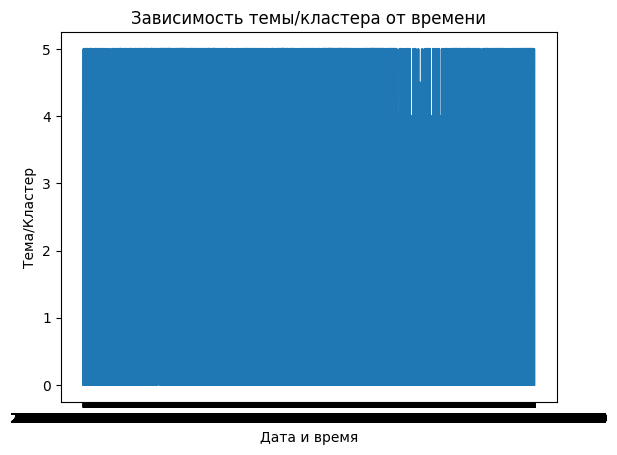

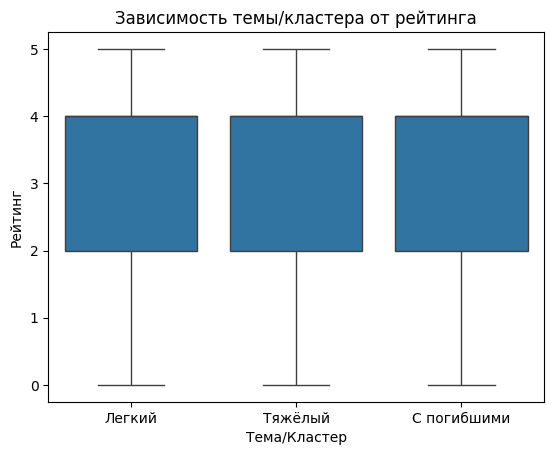

NameError: name 'keywords' is not defined

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что у вас есть DataFrame data с данными
# Визуализация зависимости темы/кластера от временных признаков
sns.lineplot(x='datetime', y='light', data=data)
plt.title('Зависимость темы/кластера от времени')
plt.xlabel('Дата и время')
plt.ylabel('Тема/Кластер')
plt.show()

# Визуализация зависимости темы/кластера от рейтинга
sns.boxplot(x='severity', y='light', data=data)
plt.title('Зависимость темы/кластера от рейтинга')
plt.xlabel('Тема/Кластер')
plt.ylabel('Рейтинг')
plt.show()

# Визуализация зависимости темы/кластера от ключевых слов/ n-грамм
# Предположим, что у вас есть DataFrame keywords с данными о ключевых словах
keywords = keywords.groupby('topic').head(10)  # Выбираем топ-10 ключевых слов для каждой темы
plt.figure(figsize=(10, 6))
for index, row in keywords.iterrows():
    plt.text(row['frequency'], row['topic'], row['word'])
sns.scatterplot(x='frequency', y='topic', data=keywords, hue='topic', legend=False)
plt.title('Зависимость темы/кластера от ключевых слов/ n-грамм')
plt.xlabel('Частота')
plt.ylabel('Тема/Кластер')
plt.show()

# Визуальный анализ статистики публикаций
plt.figure(figsize=(10, 6))
sns.countplot(x='topic', data=data)
plt.title('Статистика публикаций по темам/кластерам')
plt.xlabel('Тема/Кластер')
plt.ylabel('Количество публикаций')
plt.show()